In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline


In [2]:
pd.options.mode.chained_assignment = None #turn off the SettingWithCopyWarning warning that is raised
#when assigning values to a slice of a DataFrame.

In [3]:
data = pd.read_csv(r"C:\Users\panka\Downloads\Online Retail Data Set.csv\Online Retail Data Set.csv", encoding = "unicode_escape")
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [4]:
# Generated profile report of the data set
import pandas_profiling as pp
profile = pp.ProfileReport(data)
profile

C:\Users\panka\AppData\Local\Temp\ipykernel_2536\742339736.py:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
# Checking missing values
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

# CustomerID is having a total 24.9% of missing values and Description is having a total 0.3% missing values

In [6]:
#Handling the missing values

data['Description'] = data['Description'].fillna("Missing")
data['CustomerID'] = data['CustomerID'].fillna(0)

In [7]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [8]:
data.duplicated().sum()

5268

# There are 5268 rows duplicated 

In [9]:
data = data.drop_duplicates() # Removing the duplicate rows

In [10]:
data.duplicated().sum()

0

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    536641 non-null  object 
 1   StockCode    536641 non-null  object 
 2   Description  536641 non-null  object 
 3   Quantity     536641 non-null  int64  
 4   InvoiceDate  536641 non-null  object 
 5   UnitPrice    536641 non-null  float64
 6   CustomerID   536641 non-null  float64
 7   Country      536641 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.8+ MB


In [12]:
# Converting features to a proper datatpe
data['InvoiceDate']=pd.to_datetime(data['InvoiceDate'])
data['CustomerID'] = data['CustomerID'].astype(int)

In [13]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850,United Kingdom


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    536641 non-null  object        
 1   StockCode    536641 non-null  object        
 2   Description  536641 non-null  object        
 3   Quantity     536641 non-null  int64         
 4   InvoiceDate  536641 non-null  datetime64[ns]
 5   UnitPrice    536641 non-null  float64       
 6   CustomerID   536641 non-null  int32         
 7   Country      536641 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 34.8+ MB


In [15]:
#Now seprating Invoive data into four different features as year, Month, Day and Time
data['Year']=data['InvoiceDate'].dt.year
data['Month']=data['InvoiceDate'].dt.month_name()
data['Day']=data['InvoiceDate'].dt.day_name()
data['Time']=data['InvoiceDate'].dt.time


In [16]:
#Creating a coloum for Total as Total

data['Total']=data['Quantity']*data['UnitPrice']

In [17]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Time,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850,United Kingdom,2010,January,Tuesday,08:26:00,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,2010,January,Tuesday,08:26:00,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850,United Kingdom,2010,January,Tuesday,08:26:00,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,2010,January,Tuesday,08:26:00,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,2010,January,Tuesday,08:26:00,20.34


Structuring

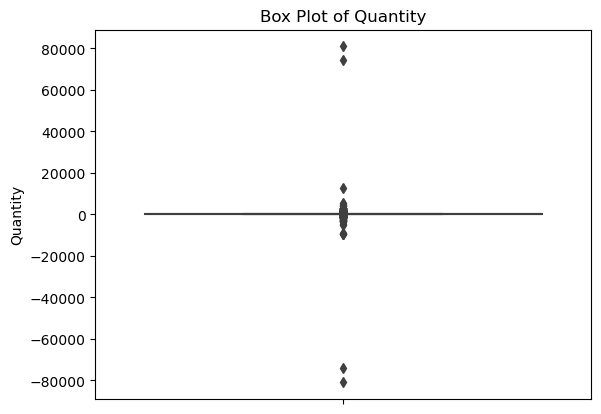

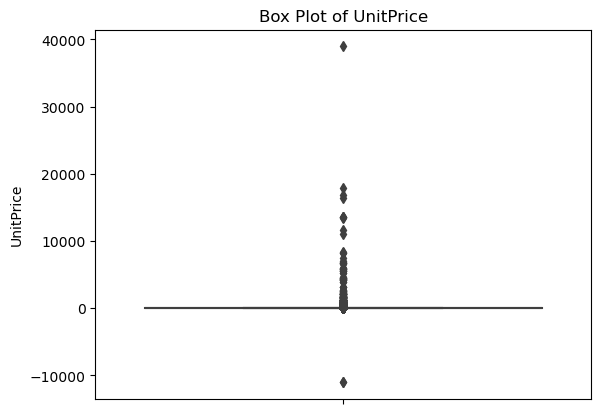

In [18]:
plot=['Quantity', 'UnitPrice']
for column in plot:
    sns.boxplot(y=column, data=data)
    plt.title(f'Box Plot of {column}')
    plt.show()

In [19]:
# As its shows both Unitprice and Quantity have negative values so checking them and handle.
data[data["UnitPrice"]<0]
#Seems Because of the debt Unitprice got negative so can remove those rows from the data as those rows are not required for the analysis.


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Time,Total
299983,A563186,B,Adjust bad debt,1,2011-12-08 14:51:00,-11062.06,0,United Kingdom,2011,December,Thursday,14:51:00,-11062.06
299984,A563187,B,Adjust bad debt,1,2011-12-08 14:52:00,-11062.06,0,United Kingdom,2011,December,Thursday,14:52:00,-11062.06


In [20]:
data = data[data['UnitPrice']>0]
data['UnitPrice'].min()
#Data has been flitring out here
#We can check by checking the minimum value of the Unitprice

0.001

In [21]:
data[data["Quantity"]<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Time,Total
141,C536379,D,Discount,-1,2010-01-12 09:41:00,27.50,14527,United Kingdom,2010,January,Tuesday,09:41:00,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-01-12 09:49:00,4.65,15311,United Kingdom,2010,January,Tuesday,09:49:00,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-01-12 10:24:00,1.65,17548,United Kingdom,2010,January,Tuesday,10:24:00,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-01-12 10:24:00,0.29,17548,United Kingdom,2010,January,Tuesday,10:24:00,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-01-12 10:24:00,0.29,17548,United Kingdom,2010,January,Tuesday,10:24:00,-6.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-09-12 09:57:00,0.83,14397,United Kingdom,2011,September,Monday,09:57:00,-9.13
541541,C581499,M,Manual,-1,2011-09-12 10:28:00,224.69,15498,United Kingdom,2011,September,Monday,10:28:00,-224.69
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-09-12 11:57:00,10.95,15311,United Kingdom,2011,September,Monday,11:57:00,-54.75
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-09-12 11:58:00,1.25,17315,United Kingdom,2011,September,Monday,11:58:00,-1.25


In [22]:
#Negative Quantity can be the case of cancelled order
#so we can create a seprate database for canceled order from real orders.
cancelled_purchases = data[data['Quantity'] < 0]
data = data[data['Quantity']>0]

In [23]:
data.shape

(524878, 13)

# Analysis

1) What was the best month for sales?

In [24]:
year=data['Year'].unique()
print(year)

[2010 2011]


In [25]:
sales_2010 = data[data['Year']== 2010].groupby('Month').sum()[['Total']].reset_index()
sales_2011 = data[data['Year']== 2011].groupby('Month').sum()[['Total']].reset_index()

C:\Users\panka\AppData\Local\Temp\ipykernel_2536\337962048.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_2010 = data[data['Year']== 2010].groupby('Month').sum()[['Total']].reset_index()
C:\Users\panka\AppData\Local\Temp\ipykernel_2536\337962048.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_2011 = data[data['Year']== 2011].groupby('Month').sum()[['Total']].reset_index()


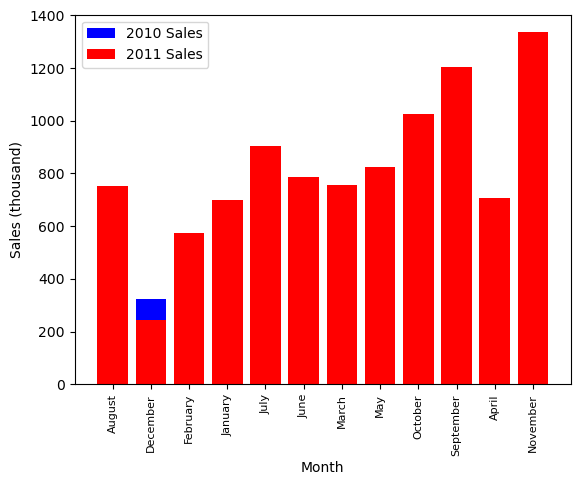

In [26]:
plt.bar(sales_2010["Month"],sales_2010['Total']/1000, label='2010 Sales', color='blue')
plt.bar(sales_2011["Month"],sales_2011['Total']/1000, label='2011 Sales', color='red')
plt.xticks(rotation = 'vertical',size = 8)
plt.ylabel("Sales (thousand)")
plt.xlabel("Month")
plt.legend()
plt.show()

Based on the analysis, it was found that the month with the highest total sales in 2011 was November, followed by October and September, while April and February had the least total sales. As for the year 2010, data was only available for December.

2) What time should we display advertisements to maximize likelihood of customer's buying product?

In [27]:
data['Hour']=data['InvoiceDate'].dt.hour
BestTimeAdds = data.groupby('Hour').count().reset_index()

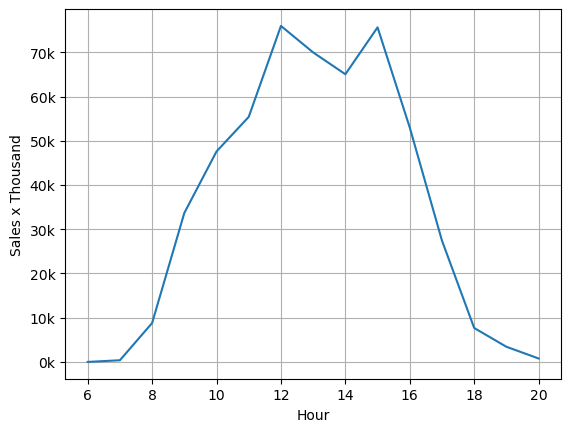

In [28]:
from matplotlib.ticker import StrMethodFormatter
plt.plot(BestTimeAdds['Hour'],BestTimeAdds['InvoiceNo']/1000)
plt.xlabel('Hour')
plt.ylabel('Sales x Thousand')
formatter = StrMethodFormatter('{x:.0f}k')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.show()

According to the data, the ideal time for this e-commerce company to run ads is between 10AM and 4PM as this time period yields the highest sales. It is possible that this is because customers are more likely to be available during their break times and are more likely to use their mobile devices or computers during these hours

3) What Products are most often sold together

In [29]:
soldTogether = data.groupby("InvoiceNo")['Description'].agg(lambda x : " , ".join(x)).reset_index()
soldTogether

,InvoiceNo,Description
0,536365,"WHITE HANGING HEART T-LIGHT HOLDER , WHITE MET..."
1,536366,"HAND WARMER UNION JACK , HAND WARMER RED POLKA..."
2,536367,"ASSORTED COLOUR BIRD ORNAMENT , POPPY'S PLAYHO..."
3,536368,"JAM MAKING SET WITH JARS , RED COAT RACK PARIS..."
4,536369,BATH BUILDING BLOCK WORD
...,...,...
19955,581584,"RED FLOCK LOVE HEART PHOTO FRAME , 6 CHOCOLATE..."
19956,581585,"BLACK TEA TOWEL CLASSIC DESIGN , ASSORTED BOTT..."
19957,581586,"LARGE CAKE STAND HANGING STRAWBERY , SET OF 3..."
19958,581587,"CIRCUS PARADE LUNCH BOX , PLASTERS IN TIN CIR..."


In [30]:
from itertools import combinations
from collections import Counter
count = Counter()
for row in soldTogether['Description']:
    row_list = row.split(",")
    #item mostly solved together , here it shows 2 items sold together,we can change it to 3
    #to show 3 items sold together and so on ...
    count.update(Counter(combinations(row_list,2)))
#most_common is method from collections
for key,value in count.most_common(10):
    print(key,value)

(' KEY FOB ', ' KEY FOB ') 743
(' KEY FOB ', ' BACK DOOR  ') 544
(' KEY FOB ', ' SHED ') 511
(' JUMBO BAG PINK POLKADOT ', ' JUMBO BAG RED RETROSPOT ') 477
(' KEY FOB ', ' FRONT  DOOR  ') 455
(' GREEN REGENCY TEACUP AND SAUCER ', ' ROSES REGENCY TEACUP AND SAUCER  ') 443
('COFFEE', 'SUGAR ') 432
(' JUMBO SHOPPER VINTAGE RED PAISLEY ', ' JUMBO BAG RED RETROSPOT ') 427
(' SET 3 RETROSPOT TEA', 'COFFEE') 426
(' SET 3 RETROSPOT TEA', 'SUGAR ') 414


Analysis (Pair Products) : we can see that Key Fob are mostly sold with extra pair of Key Fob or with Back Door or with Shed. And so on... FeedBack : we can recommend our customer in buying these items while purchasing for one item, this way we can enhance sales.

4) What product sold the most ?

In [31]:
soldMost = data.groupby('Description').sum()[['Quantity']].reset_index()
soldMost = soldMost.sort_values('Quantity',ascending = False ).head(5) #the data was big for products so i have
#just got results for top 10
soldMost

C:\Users\panka\AppData\Local\Temp\ipykernel_2536\297490087.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  soldMost = data.groupby('Description').sum()[['Quantity']].reset_index()


,Description,Quantity
2387,"PAPER CRAFT , LITTLE BIRDIE",80995
2052,MEDIUM CERAMIC TOP STORAGE JAR,78033
3934,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54951
1816,JUMBO BAG RED RETROSPOT,48371
3844,WHITE HANGING HEART T-LIGHT HOLDER,37872


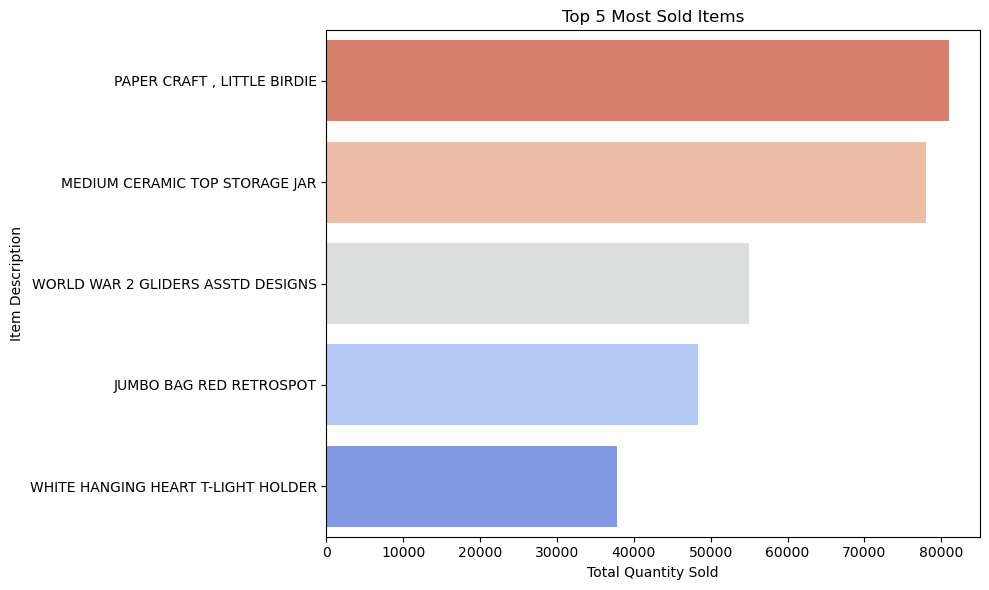

In [33]:
plt.figure(figsize=(10, 6))
colors = sns.color_palette("coolwarm_r", len(soldMost))
sns.barplot(x='Quantity', y='Description', data=soldMost, palette=colors)
plt.xlabel('Total Quantity Sold')
plt.ylabel('Item Description')
plt.title('Top 5 Most Sold Items')
plt.tight_layout()
plt.show()

4) Which countries have more customers?

In [34]:
custCountry = data['Country'].value_counts().reset_index(drop = False).head(10)
custCountry.columns = ['Country','Counts']

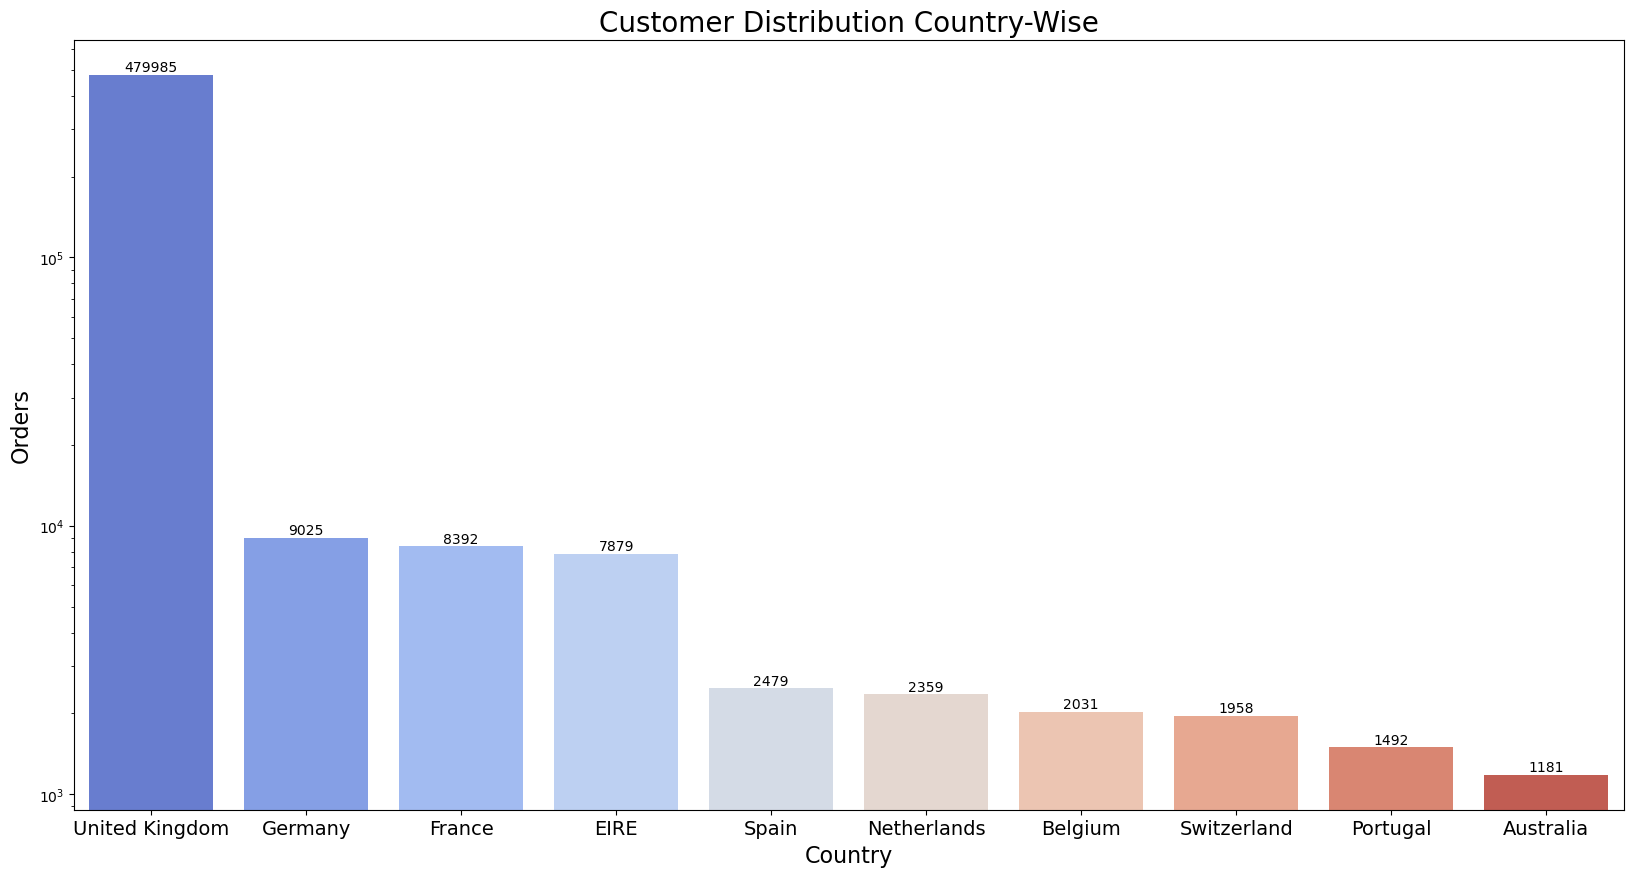

In [36]:
plt.figure(figsize = (20,10))
ax =sns.barplot(x= 'Country', y = 'Counts' , data = custCountry, palette = 'coolwarm')
ax.bar_label(ax.containers[0])
plt.title("Customer Distribution Country-Wise",fontsize=20)
plt.ylabel("Orders",fontsize = 16)
plt.xlabel('Country',fontsize = 16)
plt.xticks(fontsize = 14)
plt.yscale('log')

RMF Analysis As a algorithm the RFM was used, for being an easy-to-understand model.

The term RFM comes from the function of three acronyms: Recency, Frequency, and Monetary, seeking to better understand the customer and verify when was his last purchase, how many times he has bought and how much he has spent with the company.

Recency(R) Days since the customer's last purchase Frequency(F) Number of products bought by the customer Monetarity(M) Totalspent on purchases

Customer Score:

The customer score ranges from 1 to 5, where the higher this number, the better. This score is assigned for each acronym independently:

The more recent the customer's purchase the higher the Recency (R) score.

The more purchases the customer makes, the higher the Frequency score (F)

The more the customer spends on purchases, the higher the score the customer will have Monetarity(M)

This definition of each score can be given through inference, i.e. some business definition or by quintile

In [40]:
copy = data.copy()

In [42]:
#Ignoring Cancel orders
copy[~copy['InvoiceNo'].str.contains('C' ,na = False)]
#Dropping Null values in Customer ID column
copy= copy.dropna(subset= ['CustomerID'])
#Make Checkoutprice Column
copy['CheckoutPrice'] = copy['UnitPrice'] * copy['Quantity']
#Ignoring Debts
copy =copy[copy['UnitPrice']>0]
#Dealing with datatypes
copy['InvoiceDate'] = pd.to_datetime(copy['InvoiceDate'])
copy['CustomerID'] = copy['CustomerID'].astype('int64')
recent_date = copy['InvoiceDate'].max()
#Set our data to rfm Analysis
rfm = copy.groupby('CustomerID').agg({'InvoiceDate' : lambda date : (recent_date - date.max()).days ,
'InvoiceNo' : lambda num :num.nunique() ,
'CheckoutPrice' : lambda CheckoutPrice :CheckoutPrice.sum()} )
rfm

,InvoiceDate,InvoiceNo,CheckoutPrice
CustomerID,,,
0,0,1428,1754901.91
12346,326,1,77183.60
12347,40,7,4310.00
12348,76,4,1797.24
12349,19,1,1757.55
...,...,...,...
18280,160,1,180.60
18281,4,1,80.82
18282,216,2,178.05


In [43]:
rfm.columns = ['Recency' ,'Frequency' , 'Monetary']
#Ignore 0 in Monatery so we will not need those customers in our analysis
rfm = rfm[rfm['Monetary']>0]
#Set Recency Score
rfm['Recency_Score'] = pd.qcut(rfm['Recency'] ,5 , labels= [5,4,3,2,1])
#Set Frequency Score
rfm['Frequency_Score'] = pd.qcut(rfm['Frequency'].rank(method ='first') ,5 , labels= [1,2,3,4,5])
#Set Monatry Score
rfm['Monetary_Score'] = pd.qcut(rfm['Monetary'] ,5 , labels= [1,2,3,4,5])
#Set RFM Score
rfm['RFM_Score'] = (rfm['Recency_Score'].astype(str) + rfm['Frequency_Score'].astype(str) +
rfm['Monetary_Score'].astype(str) )
rfm

,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score
CustomerID,,,,,,,
0,0,1428,1754901.91,5,5,5,555
12346,326,1,77183.60,1,1,5,115
12347,40,7,4310.00,4,5,5,455
12348,76,4,1797.24,3,4,4,344
12349,19,1,1757.55,4,1,4,414
...,...,...,...,...,...,...,...
18280,160,1,180.60,2,2,1,221
18281,4,1,80.82,5,2,1,521
18282,216,2,178.05,1,3,1,131


Segmentation calculation: The calculation to know which segmentation the customer is in is given by averaging the F and R scores I see that Monetary could be deceptive , So i will segment our customers on Recency and Frequency Scores

In [44]:
seg_map = {
r'[1-2][1-2][1-5]': 'Hibernating',
r'[1-2][3-4][1-5]': 'At risk',
r'[1-2]5[1-5]' :'Cannot lose them',
r'3[1-2][1-5]' : 'About to sleep',
r'33[1-5]' : 'Need Attention',
r'[3-4][4-5][1-5]' : 'Loyal Customers',
r'[4-5][1-3][1-5]' : 'Good Potential',
r'5[4-5][1-5]' : 'Champions',
}
rfm['Segment'] = rfm['RFM_Score'] .replace(seg_map ,regex =True)

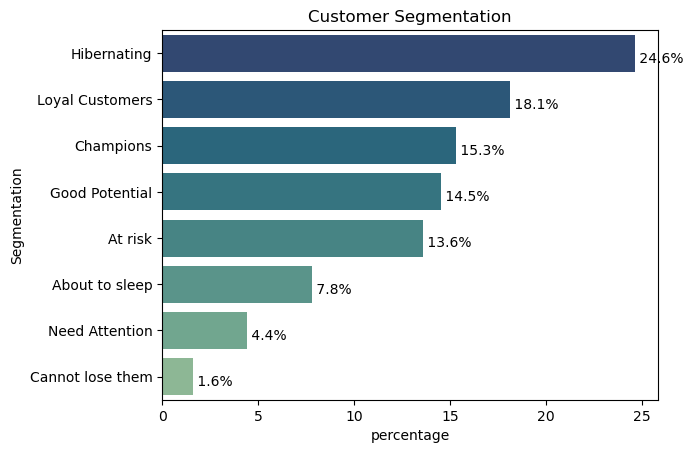

In [45]:
Segments = (rfm['Segment'].value_counts(normalize=True)* 100).reset_index(name='percentage')
Segments = Segments.round(1)
b =sns.barplot(y='index',x='percentage', data=Segments, palette = 'crest_r')
for i, v in enumerate(Segments['percentage']):
    b.text(v,i+0.20," {:.1f}".format(v)+"%", color='black', ha="left")
    b.set_ylabel('Segmentation')
    b.set_title('Customer Segmentation')

Findings

24.1% of our customers are in the hibernation segment and that for customers who have purchased from us a few times and the last time was a long time

18.4% of our customers are loyal and usually buys from us

14.8% of our customers are champions so we are their favourtie market

14.4% of our customers have good potential that refers to customers who have bought from us recently and have not buy many times

14.1% of our cutomeers are at risk segment so we must attract them again

8.4% of our customers are about to sleep and this segment of customers who last purchase from us for a fairly long time

4.2% of our customers are needing more attention to make them fall under Champions segment

1.6% of our customers can`t lost them and they purchased from us many times but last time was for a long time